In [1]:
import tensorflow as tf   #mail library which help computer to understand the plant disease
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/train',          # Path to the directory containing the training images
    labels='inferred',         # Automatically infers labels from the directory structure
    label_mode='categorical',  # Labels are returned as one-hot encoded vectors
    image_size=(128, 128),     # Resizes all images to 256x256 pixels
    class_names=None,          # Class names are inferred from the directory structure
    color_mode='rgb',          # Loads images in RGB mode
    batch_size=32,             # Number of images to return in each batch
    shuffle=True,              # Shuffles the data
    seed=123,                  # Seed for random number generator (for reproducibility)
    validation_split=None,     # No validation split
    subset=None,               # No subset (use the entire dataset)
    interpolation='bilinear',  # Interpolation method used when resizing images
    follow_links=False,         # Whether to follow symbolic links
    crop_to_aspect_ratio = False # Whether to crop the images to match the aspect ratio
)

Found 70296 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',          # Path to the directory containing the training images
    labels='inferred',         # Automatically infers labels from the directory structure
    label_mode='categorical',  # Labels are returned as one-hot encoded vectors
    image_size=(128, 128),     # Resizes all images to 256x256 pixels
    class_names=None,          # Class names are inferred from the directory structure
    color_mode='rgb',          # Loads images in RGB mode
    batch_size=32,             # Number of images to return in each batch
    shuffle=True,              # Shuffles the data
    seed=123,                  # Seed for random number generator (for reproducibility)
    validation_split=None,     # No validation split
    subset=None,               # No subset (use the entire dataset)
    interpolation='bilinear',  # Interpolation method used when resizing images
    follow_links=False,         # Whether to follow symbolic links
    crop_to_aspect_ratio=False # Whether to crop the images to match the aspect ratio
)

Found 17572 files belonging to 38 classes.


In [4]:
cnn = tf.keras.models.Sequential()
# when we use this methhod we need to add some parameter
#which call hidden layers

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3])) #relu means rectified linear unit using this we avoide error
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))  # Corrected line
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

c:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3])) #relu means rectified linear unit using this we avoide error
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))  # Corrected line
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3])) #relu means rectified linear unit using this we avoide error
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))  # Corrected line
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3])) #relu means rectified linear unit using this we avoide error
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))  # Corrected line
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
# now to avoide overfitting we use dropout method
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
#adding Flattern layers
#flattern layers is used to convert the 2D array into 1D array
#which is use in dense layers
cnn.add(tf.keras.layers.Flatten())

In [11]:
# in dense layers we forst taking the output of 1500 units
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))

#The Dense layer, also known as a fully connected layer, 
# is a fundamental building block of neural networks. 
# In a dense layer, each neuron receives input from all the neurons in the previous layer, 
# making it "fully connected." The dense layer performs the following operations:
# Weighted sum of the input and bias
# Application of an activation function

In [12]:
# Now we need to agin use dropout method to avoide overfitting
cnn.add(tf.keras.layers.Dropout(0.5))

In [13]:
# NOW add again we need to take 38 units in dense layers
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

In [14]:
# Now the compile time
# in compile time we need to add some parameter
# like loss, optimizer, metrics
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#Loss Function: The function used to measure how well the model's predictions match the true labels. For multi-class classification,
# categorical_crossentropy is commonly used.
#Optimizer: The algorithm used to adjust the weights of the network during training. Adam is a common optimizer.
#Metrics: The evaluation criteria used to measure the performance of the model. Accuracy is a common metric for classification tasks.

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,049,866 (122.26 MB)

 Trainable params: 32,049,866 (122.26 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Now for training history
history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3278s 1s/step - accuracy: 0.5066 - loss: 1.7675 - val_accuracy: 0.8967 - val_loss: 0.3267
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3420s 2s/step - accuracy: 0.8809 - loss: 0.3756 - val_accuracy: 0.9409 - val_loss: 0.1825
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3293s 1s/step - accuracy: 0.9368 - loss: 0.1946 - val_accuracy: 0.9598 - val_loss: 0.1215
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3441s 2s/step - accuracy: 0.9586 - loss: 0.1271 - val_accuracy: 0.9598 - val_loss: 0.1230
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3182s 1s/step - accuracy: 0.9708 - loss: 0.0912 - val_accuracy: 0.9608 - val_loss: 0.1205


In [17]:
train_loss, train_accuracy = cnn.evaluate(training_set)
print(f"Training Accuracy: {train_accuracy}")

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 844s 384ms/step - accuracy: 0.9881 - loss: 0.0370
Training Accuracy: 0.989188551902771


In [18]:
#validation set Accuracy
val_loss, val_accuracy = cnn.evaluate(validation_set)
print(f"Validation Accuracy: {val_accuracy}")

550/550 ━━━━━━━━━━━━━━━━━━━━ 199s 363ms/step - accuracy: 0.9606 - loss: 0.1220
Validation Accuracy: 0.9607899188995361


In [19]:
cnn.save('Plant_Identification.keras')

In [20]:
history.history  #history of the model

{'accuracy': [0.687791645526886,
  0.8971349596977234,
  0.9420735239982605,
  0.9605240821838379,
  0.9704819917678833],
 'loss': [1.0607759952545166,
  0.3207091689109802,
  0.17741593718528748,
  0.11986842006444931,
  0.09120862931013107],
 'val_accuracy': [0.8967106938362122,
  0.9409287571907043,
  0.9597655534744263,
  0.959822416305542,
  0.9607899188995361],
 'val_loss': [0.326712965965271,
  0.1824776530265808,
  0.12148389965295792,
  0.1230102926492691,
  0.12049420922994614]}

In [21]:
#recording history in json file
import json
with open('history.json', 'w') as f:
    json.dump(history.history, f)

In [22]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


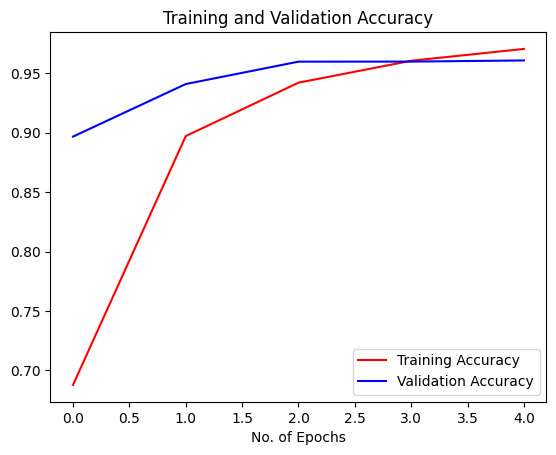

In [23]:
epochs = [i for i in range(5)]
plt.plot(epochs, history.history['accuracy'], color = 'Red', label= 'Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], color = 'Blue', label= 'Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [24]:
class_names = validation_set.class_names

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',          # Path to the directory containing the training images
    labels='inferred',         # Automatically infers labels from the directory structure
    label_mode='categorical',  # Labels are returned as one-hot encoded vectors
    image_size=(128, 128),     # Resizes all images to 256x256 pixels
    class_names=None,          # Class names are inferred from the directory structure
    color_mode='rgb',          # Loads images in RGB mode
    batch_size=32,             # Number of images to return in each batch
    shuffle=True,              # Shuffles the data
    seed=123,                  # Seed for random number generator (for reproducibility)
    validation_split=None,     # No validation split
    subset=None,               # No subset (use the entire dataset)
    interpolation='bilinear',  # Interpolation method used when resizing images
    follow_links=False,         # Whether to follow symbolic links
    crop_to_aspect_ratio=False # Whether to crop the images to match the aspect ratio
)

Found 17572 files belonging to 38 classes.


In [26]:
y_pred = cnn.predict(test_set)
predictions = tf.argmax(y_pred, axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 200s 363ms/step


In [27]:
# now we need to create  confusion matrix
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true=tf.argmax(true_categories, axis=1)

In [28]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([32, 23, 25, ..., 16, 15, 14], dtype=int64)>

In [29]:
predictions


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([28,  9,  1, ..., 17, 28,  2], dtype=int64)>

In [30]:
# noe the time is for confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predictions)

In [31]:
print(classification_report(Y_true, predictions, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.04      0.04      0.04       504
                                 Apple___Black_rot       0.04      0.05      0.05       497
                          Apple___Cedar_apple_rust       0.02      0.02      0.02       440
                                   Apple___healthy       0.03      0.03      0.03       502
                               Blueberry___healthy       0.03      0.03      0.03       454
          Cherry_(including_sour)___Powdery_mildew       0.03      0.03      0.03       421
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.03      0.03      0.03       410
                       Corn_(maize)___Common_rust_       0.04      0.04      0.04       477
               Corn_(maize)___Northern_Leaf_Blight       0.02      0.02      0.

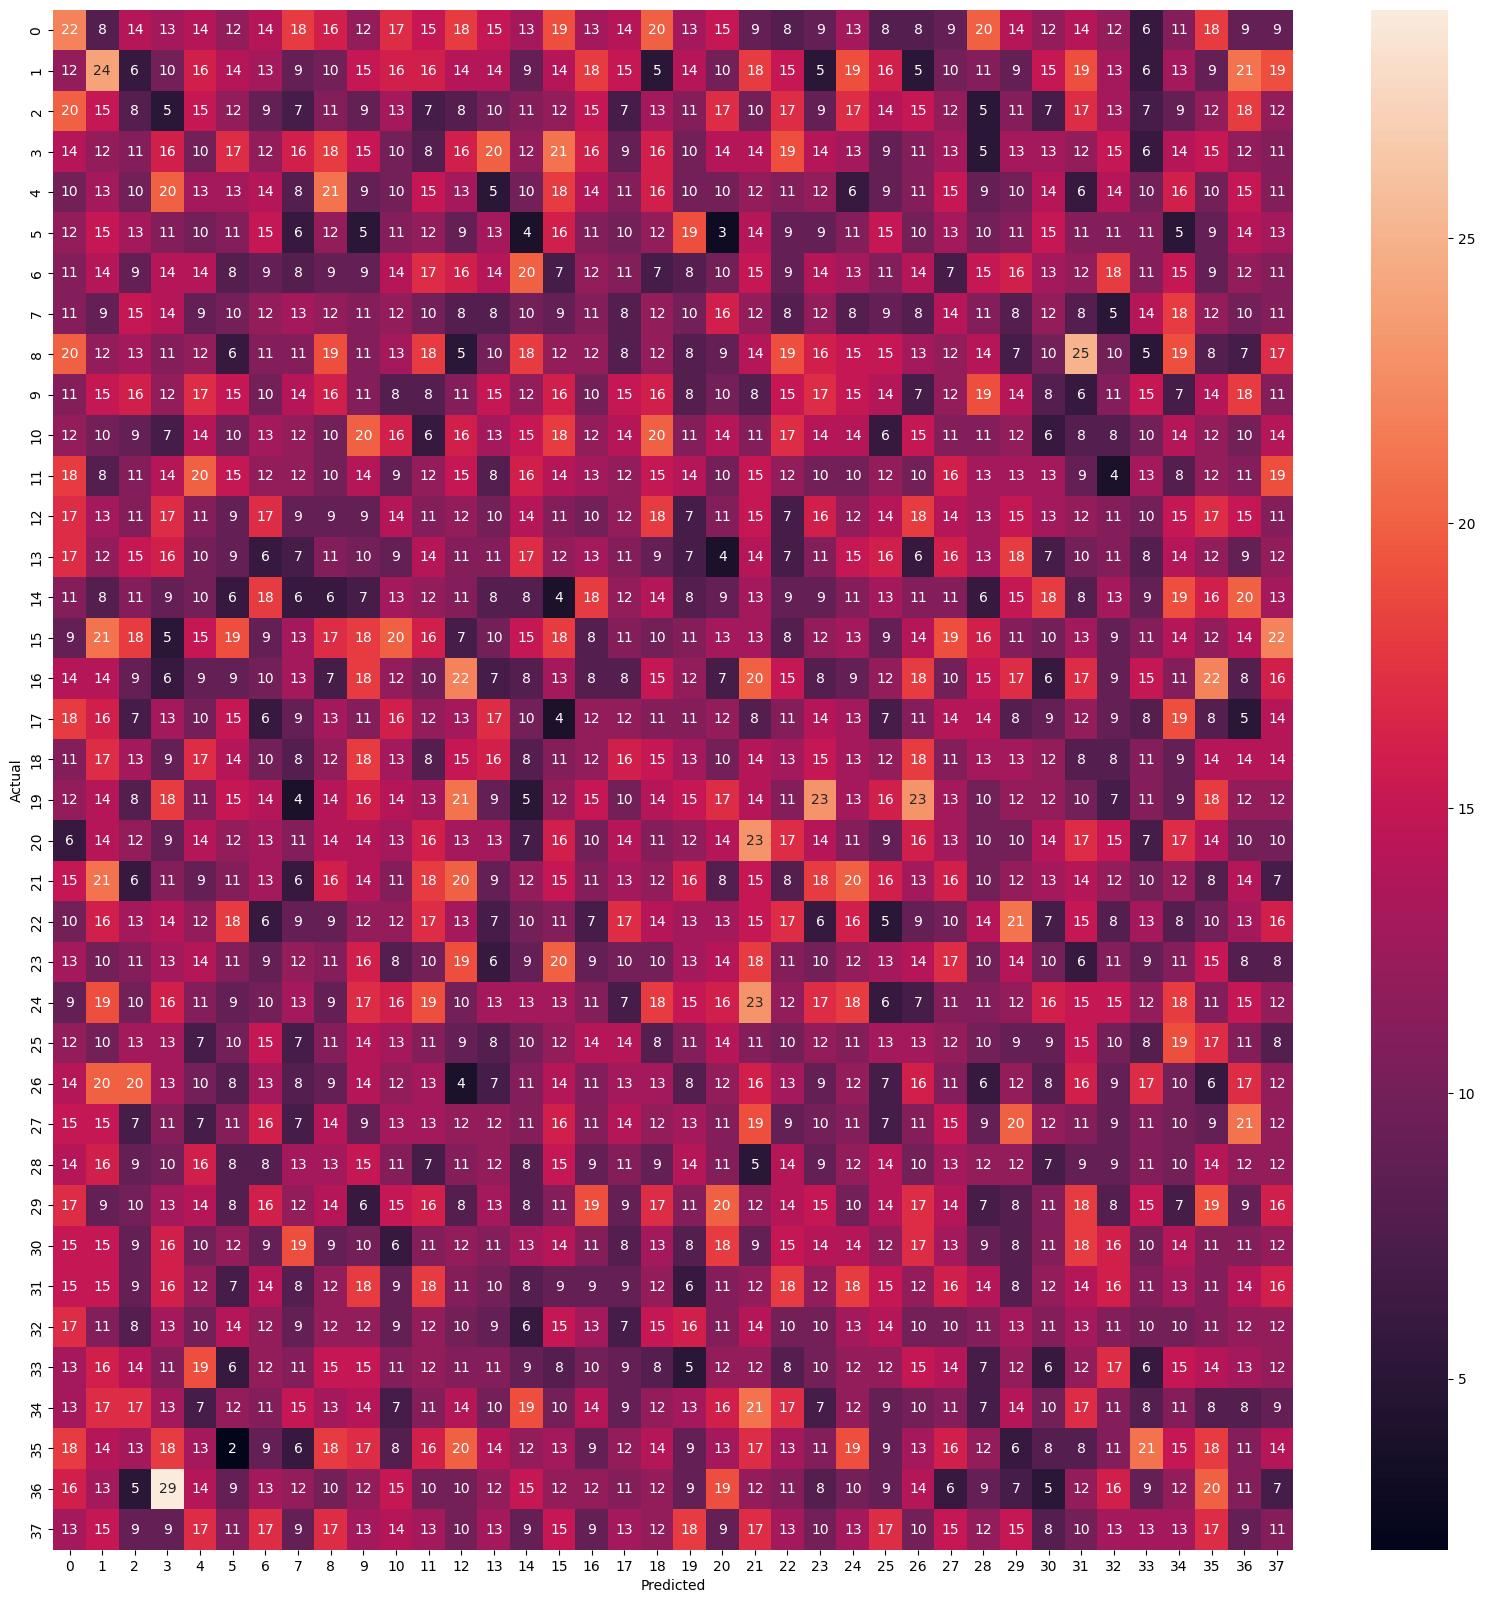

In [32]:
# NO the code for heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

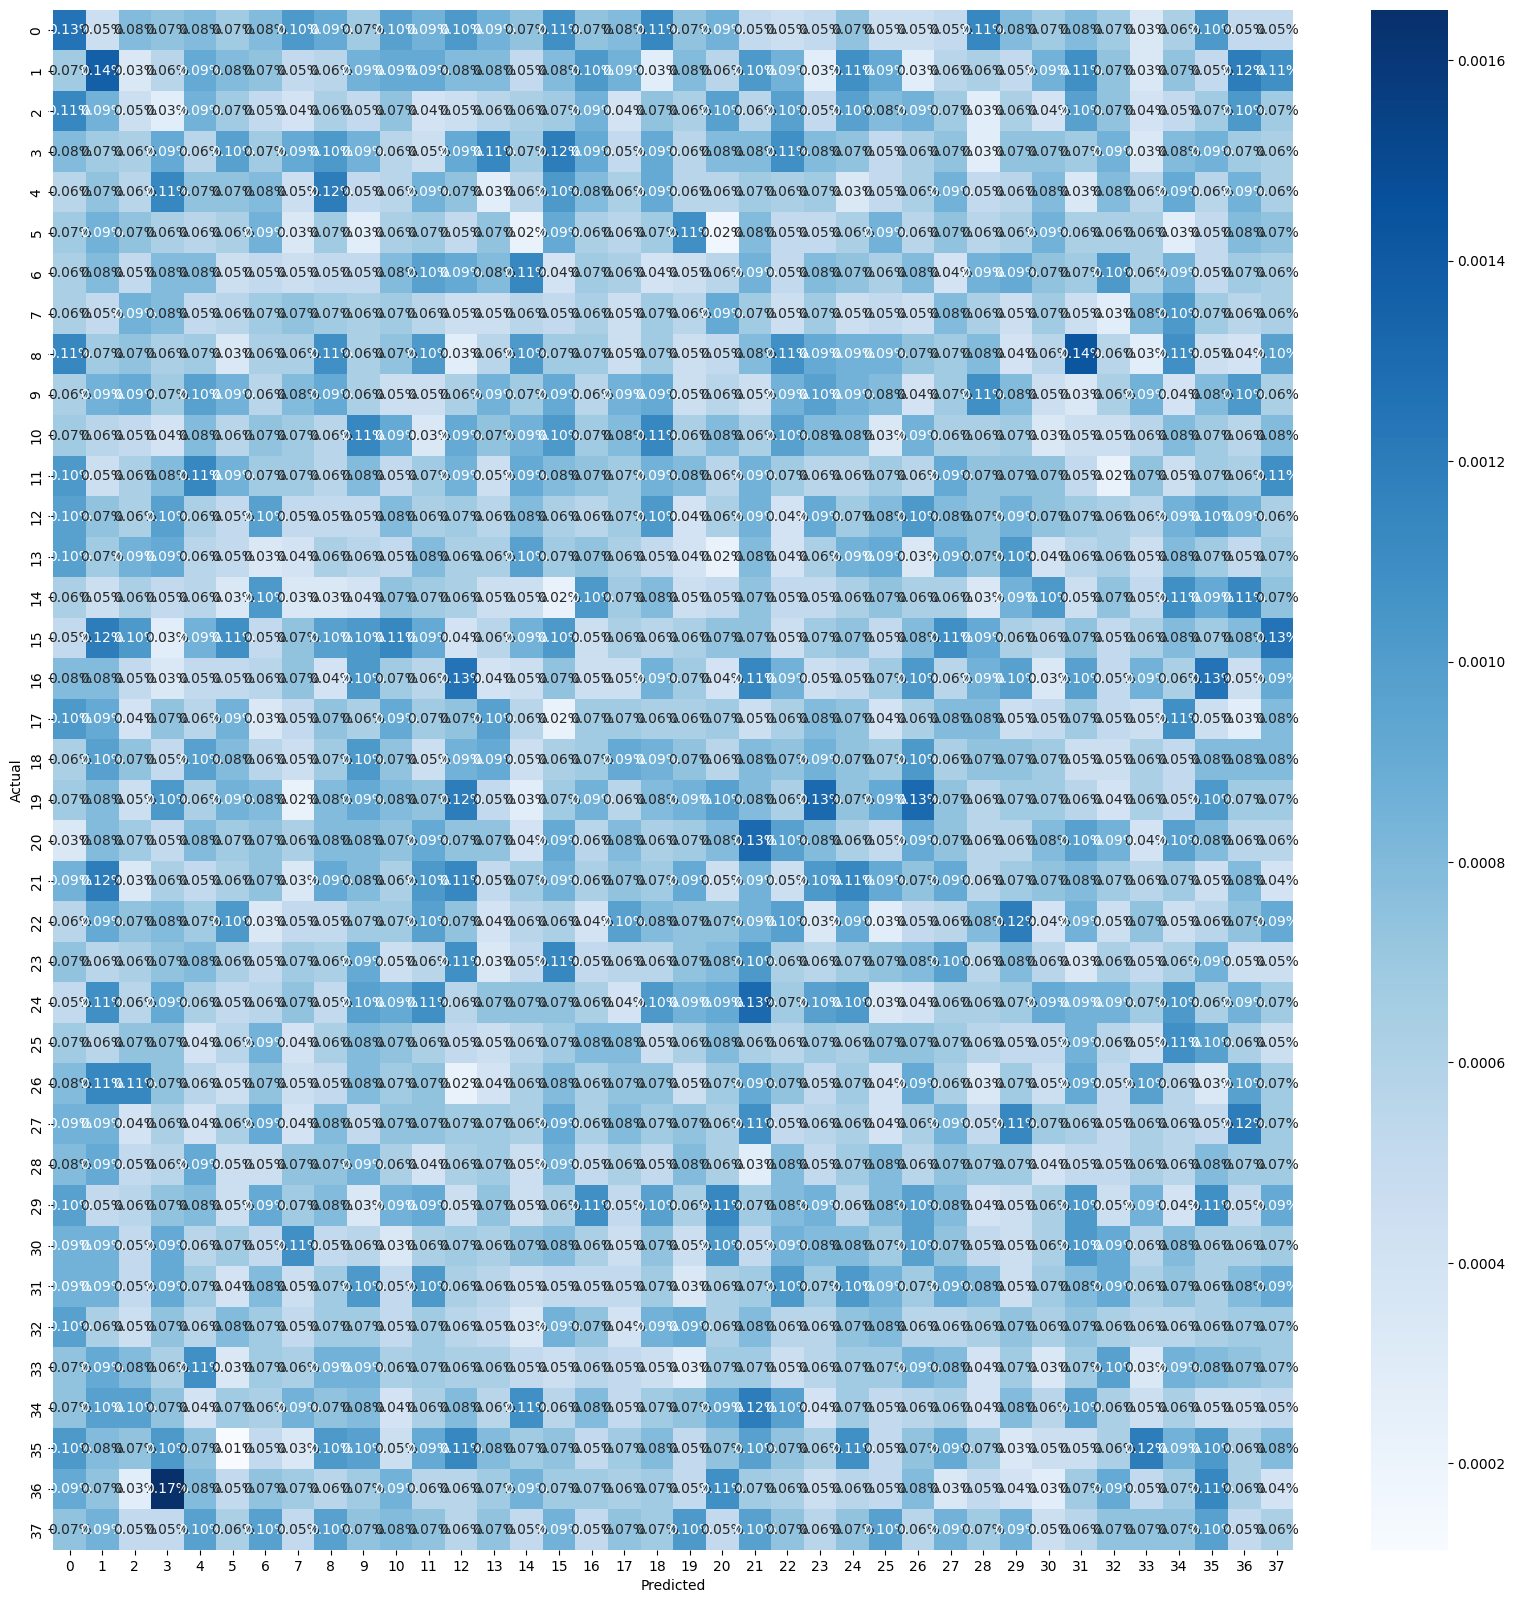

In [33]:
# now for the confusion matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()